## Agent Based Modeling (ABM): Apple Trading Model 2

-----------

This material is based on the previous version of CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Review: ABM phases
- Setup: instantion (creation) of world
    - Describe the world you will be modeling and the rules that describe it
- Runtime loop: Each loop iteration: 
    - Represents one tick, or movement forward in time (minute, hour, day, ...)
    - Each agent changes it's state (say, gets more apples, or a tree catches on fire)
    - Any needed changes to world also occur, like a resource is consumed or added to    
- Exit

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/agent_based_modeling.png" width="300">

### ABM Summary

1. ABM uses three main abstractions
    - Agents with rules
    - Environment or model within which the agents live
        - This would be a grid for apple trading, where traders walk around
    - Time: time is dictated (controlled) by a the runtime loop.
        - Each loop iteration is one tick or one step of abstracted time
    

2. ABM model is a representation of the interaction of real-world objects in a complex system
    - The goal is to gain an understanding of how the model's results relate to real-world phenomena
    - Random factors built into the model and variables changed by the user (you) cause different results to be generated each time a model is run
        - When you run a model many times, each time you get a different outcome
    - We are constructing a model, not a replica    

### Learning Goals


1. Continue learning about ABM 
    1. How to use ABM
        - Conduct experiments by changing values and variables (like how many apples agents start with, or how combustible a tree is)
        - Collect and analyze results

    2. Learn how to modify ABM
        - Deconstruct models into agents, behaviors, environment, and interactions
     
    3. Learn how to create ABM
        - Implement and evaluate models

2. New: make current apple trading model more complex (abstract fewer details)
    1. Each step, if an agent has an apple, 
    2. Choose one agent at random and give them an apple
        - Remember that the model step calls each agent step in random order

       Like all the agents are in a room, trading at random with each other

3. Learn more plotting by plotting your results

### First, we have to make sure that Mesa is installed, and then import our basic packages
- Note that Pandas and Seaborn or "built-in" packages, so we only have to import them, not install them

In [8]:
! pip install mesa==2.1.1


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
import mesa

# Data visualization tools.
import seaborn as sns

# Data manipulation and analysis.
import pandas as pd

### Now, we can begin creating our apple trading agent based model (ABM)

### First, we extend the AppleTraderAgent object
- Remember, this object inherits from the class `mesa.Agent`
    - This inheritance is key and allows Mesa to use our object
    
- Each Step, 
    - If an agent has an apple
    - Choose one agent at random and give them an apple
    - Remember that the model step calls each agent step in random order

- This is like all the agents are in a room, trading at random with each other


In [3]:
# Create ABM

# 1. Define the Agent Abstraction
class AppleTraderAgent(mesa.Agent):
    """An agent that trades apples and begins with 1 apple."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's number of apples and set initial value
        self.NumberApples = 1

    def step(self):
        # Verify agent has some apples
        if self.NumberApples > 0:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent is not None:
                other_agent.NumberApples += 1
                self.NumberApples -= 1
                

### Next, we create our AppleTradingModel.  We leave this the same as before (for now).

### This defines two more of our key abstractions:
1. This defines the environment where the agents (apple traders) exist
2. This also defines how to take a step (tick) forward in time
    - The `step` function describes how to step forward in the runtime loop

### Similar to the agent, the AppleTradingModel inherits from `mesa.Model`
- This inhertiance is key and allows Mesa to use our model
- The `__init__` function describes how to create the environment and agents, using inheritance

In [4]:
# 2. Define the Model (or environment) Abstraction for the Agents to live in
class AppleTradingModel(mesa.Model):
    """A model with some number of apple trading agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = AppleTraderAgent(i, self)
            # Add the agent to the scheduler
            self.schedule.add(a)

    # 3. Define each step or time tick: 
    #    Each step or tick will call the AppleTraderAgent.step() function once
    def step(self):
        """Advance the model by one step."""

        # The model's step will call the step method of each agent
        self.schedule.step()

### And now to run the model, the syntax is easy!
1. We first create a new AppleTradingModel object called `model`
2. Then, we take 100 steps with the model

### Key Point: Running `AppleTradingModel.step()` once, in turn runs `AppleTraderAgent.step()` once for each agent

### Key Point: Remember that the agents act in a random order
  - Each `model.step()` every agents acts once, but in a random order
    


In [5]:
# Run model with 10 agents
model = AppleTradingModel(10)
for i in range(100):
    model.step()


### Our last step is to visualize the output
- We visualize how many apples each agent has
- We add the `%matplotlib inline` command, which ensures that plots appear (and aren't hidden)

### Task: in the below code cell, create a list called `all_agents_NumberApples` that contains every agent's number of apples

That is, 
  
      all_agents_NumberApples[0] 

should contain the number of apples that agent 0 owns.  And in general

      all_agents_NumberApples[k] 

should contain the number of apples that agent k owns. 

You can cycle through all the agents with a loop like this.

    for agent in model.schedule.agents:
        ...
        

In [6]:
# insert code here for all_agents_NumberApples


### Lastly, we plot a histogram with Seaborn
- Seaborn provides really sharp plots with little effort
- Pandas also provides histograms, but Seaborn requires less effort

### Study the plotting commands, ask questions

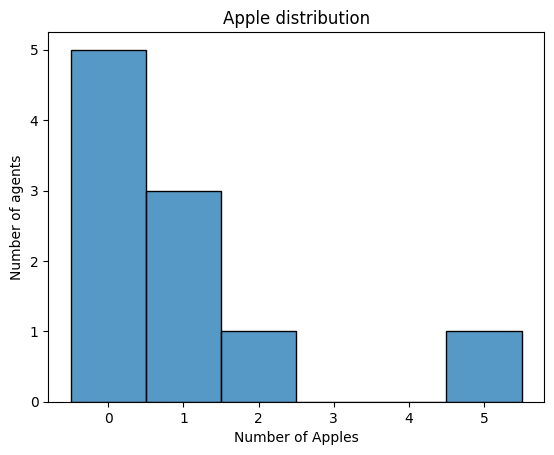

In [7]:
%matplotlib inline

# Store our data in a Pandas dataframe
df = pd.DataFrame({'all_agents_NumberApples': all_agents_NumberApples})

# Create a histogram with seaborn
ax = sns.histplot(df['all_agents_NumberApples'], discrete=True)
ax.set(title="Apple distribution", xlabel="Number of Apples", ylabel="Number of agents" )

max_apples_owned = df['all_agents_NumberApples'].max() + 1
ax.set_xticks(range(0,max_apples_owned), labels=range(0,max_apples_owned));

### Tasks
1. Change the title, label for the x-axis, and label for the y-axis
    - Then try setting `discrete=False`
    - Gain some familiarity with the plotting commands
    
    
2. Run the above cell again

        # Run model with 10 agents
        model = AppleTradingModel(10)
        for i in range(100):
            model.step()
            
   followed by running the cell that computes 
   
       all_agents_NumberApples
       
   and then running the plotting cell with Seaborn
   
   ==>  What happens?  How different are the results?
   
   
3. The histogram should change (ask if it doesn't)


4. Repeat for different numbers of agents (try 5 and 15).  

    - Also experiment with different numbers of steps (say 200, 400, and 800 steps).

### Discussion

Discuss what you found above.  Moving forward, your weekly homeworks will include significant writing.  You will be working on your discussion, building your discussion up over the labs, until you turn it in for the homework.

Focus your discussion on these experimental steps
1. Evidence acquisition 
     - Describe the experiments you conducted. Give all the details, number of agents, steps, abstractions used, and so on. 
     - You are describing application of a quantitative model (the agent based model)

2. Evidence evaluation 
    - Discuss your plots and any other results.  What did you find? 
    - You are communicating and representing quantitative information
    
3. Conclusion
    - What can you conclude?  
    - What is still unexplained? 

